In [6]:
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [7]:
def preprocess_data(file_path, target_column):
    df = pd.read_csv(file_path)
    
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataset.")
    
    y = df[target_column]
    df = df.drop(columns=[target_column])
    
    date_columns = ['list_date', 'sold_date']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    categorical_columns = [col for col in categorical_columns if col not in date_columns]
    
    for col in categorical_columns:
        df[col] = df[col].astype(str).fillna('Unknown')
    
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].median())
    
    transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
        ('scaler', StandardScaler(), numerical_columns)
    ])
    
    pipeline = Pipeline([
        ('transform', transformer)
    ])
    
    df_encoded = pipeline.fit_transform(df)
    
    if hasattr(df_encoded, 'toarray'):
        df_encoded = df_encoded.toarray()
    
    df_encoded = pd.DataFrame(df_encoded, columns=pipeline.get_feature_names_out())
    
    df_encoded[target_column] = y.values
    
    return df_encoded

In [8]:
file_path = r"C:\Users\johnk\DS-midterm_project\csvFiles\cleaned_data.csv"
target_column = "sold_price"
df_processed = preprocess_data(file_path, target_column)

In [9]:
df_processed = df_processed.apply(pd.to_numeric, errors='coerce').fillna(0)

In [10]:
X = df_processed.drop(columns=[target_column])
y = df_processed[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

print(f"Mean absolute Error: {MAE}")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean absolute Error: 4222.464956195244
Mean Squared Error: 1479414586.359825
R-Squared: 0.9956955462784169


In [13]:
#Get training data
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

#Get testing data
y_test_pred = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Metrics")
print(f"Mean absolute Error: {mae_train}")
print(f"Mean Squared Error: {mse_train}")
print(f"R-Squared: {r2_train}")

print("Testing Metrics")
print(f"Mean absolute Error: {mae_test}")
print(f"Mean Squared Error: {mse_test}")
print(f"R-Squared: {r2_test}")

Training Metrics
Mean absolute Error: 0.0
Mean Squared Error: 0.0
R-Squared: 1.0
Testing Metrics
Mean absolute Error: 4222.464956195244
Mean Squared Error: 1479414586.359825
R-Squared: 0.9956955462784169


In [14]:
# Reduce max_depth
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limiting tree depth
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 145417.02524646654
MSE: 51779538032.65056
R-squared: 0.8493440397022796


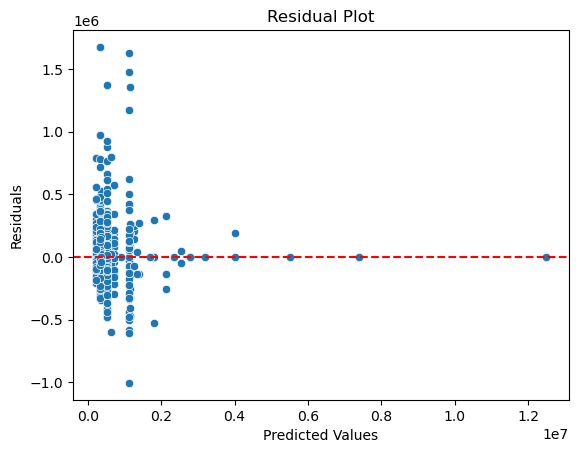

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs. predicted values
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

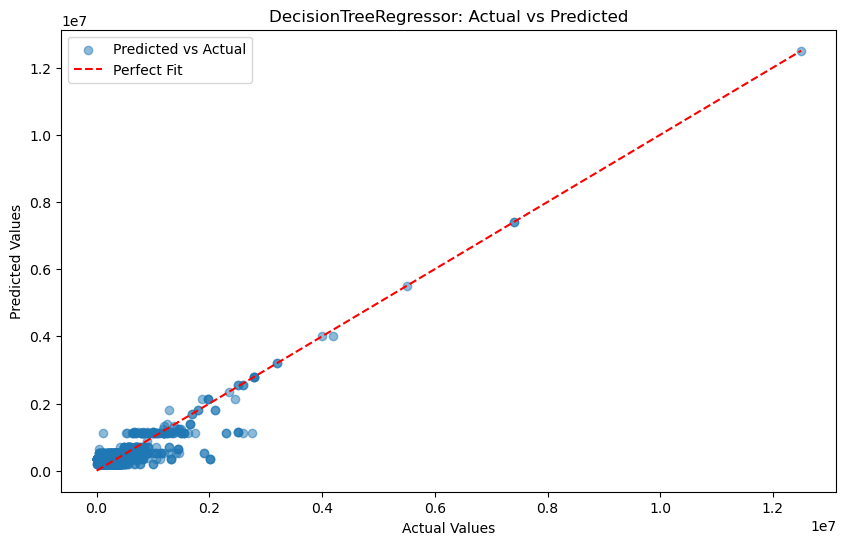

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("DecisionTreeRegressor: Actual vs Predicted")
plt.legend()
plt.show()